# Clasificaci√≥n de frutas
## Especificaciones t√©cnicas
Todos los entrenamientos de modelos de Deep Learning realizados en este cuaderno han sido realizados con una targeta gr√°fica **NVIDIA RTX 4060**.
Versiones de librer√≠as clave:
  - Tensorflow: 2.10
  - CUDA: 11.2
  - cuDDN: 8.2
## Dataset

Conjunto de 10.000 im√°genes pertenecientes a diferentes tipos de fruta.

Cabe destacar que somos conocedores de la estructuraci√≥n de carpetas de nuestro dataset, esta es la siguiente: <br>
```bash
FruitsClassification/
‚îÇ           
‚îú‚îÄ‚îÄ train/
‚îÇ   ‚îÇ‚îÄ‚îÄ clase1/
‚îÇ   ‚îÇ    ‚îú‚îÄ‚îÄ imagen1
‚îÇ   ‚îÇ    ‚îú‚îÄ‚îÄ imagen2
‚îÇ   ‚îÇ    ‚îî‚îÄ‚îÄ ...
‚îÇ   ‚îÇ‚îÄ‚îÄ clase2/
‚îÇ   .  ‚îú‚îÄ‚îÄ imagen1
‚îÇ   .    ‚îú‚îÄ‚îÄ imagen2
‚îÇ        ‚îî‚îÄ‚îÄ ...
‚îú‚îÄ‚îÄ valid/
‚îÇ   ‚îÇ‚îÄ‚îÄ clase1/
‚îÇ   ‚îÇ    ‚îú‚îÄ‚îÄ imagen1
‚îÇ   ‚îÇ    ‚îú‚îÄ‚îÄ imagen2
‚îÇ   ‚îÇ    ‚îî‚îÄ‚îÄ ...
‚îÇ   ‚îÇ‚îÄ‚îÄ clase2/
‚îÇ   .   ‚îú‚îÄ‚îÄ imagen1
‚îÇ   .   ‚îú‚îÄ‚îÄ imagen2
‚îÇ       ‚îî‚îÄ‚îÄ ...
‚îî‚îÄ‚îÄ test/
    ‚îÇ‚îÄ‚îÄ clase1/
    ‚îÇ    ‚îú‚îÄ‚îÄ imagen1
    ‚îÇ    ‚îú‚îÄ‚îÄ imagen2
    ‚îÇ    ‚îî‚îÄ‚îÄ ...
    ‚îÇ‚îÄ‚îÄ clase2/
    .   ‚îú‚îÄ‚îÄ imagen1
    .   ‚îú‚îÄ‚îÄ imagen2
        ‚îî‚îÄ‚îÄ ...
```
Como se puede apreciar en la estuctura de carpetas definida contamos con 3 carpetas diferentes (datasets):
- La primera para la etepa de **entrenamiento** del modelo.
- La segunda para la etapa de **validaci√≥n** del modelo.
- La tercera y √∫ltima para realizar predicciones con nuestro modelo ya entrenado y **testearlo**.

Cada una de estas carpetas cuenta con una carpeta por cada clase a clasificar que a su misma vez contienen imagenes de la propia clase.
  
## Objetivo

Seleccionar un modelo y arquitectura CNN apropiada para lograr una buena clasificaci√≥n de im√°genes del dataset propuesto.

Las im√°genes del conjunto de datos presentan diversas formas, tama√±os y colores, y se han capturado en diferentes condiciones de iluminaci√≥n.

El modelo de Deep Learning de clasificaci√≥n a desarrollar puede utilizarse en aplicaciones pr√°cticas, como la clasificaci√≥n de frutas en la industria agr√≠cola.


## An√°lisis exploratorio de datos (EDA)
Al tratarse de im√°genes, no podemos realizar el mismo EDA que realizariamos sobre un dataset que contiene datos num√©ricos o categ√≥ricos. <br>
Hay diferentes caracter√≠sticas de un conjunto de im√°genes que conviene explorar para conocer nuestros datos y actuar en consecuencia para el entrenamiento de nuestro modelo. <br>
En este EDA repasaremos estos puntos clave:
- ‚úÖ Distribuci√≥n de clases.
- ‚úÖ Visualizaci√≥n de muestras aleatorias.
- ‚úÖ Dimensiones y formatos de im√°genes.
- ‚úÖ Estad√≠sticas de color.
- ‚úÖ Im√°genes corruptas

### Importaci√≥n de librer√≠as necesarias para el EDA

In [1]:
# Importar librer√≠as
import matplotlib.pyplot as plt # Gr√°ficos
import numpy as np # Operaciones matem√°ticas
import os # Interacci√≥n con el sistema operativo
import pandas as pd # An√°lisis y manipulaci√≥n de datos
import random # Generaci√≥n de n√∫meros aleatorios
from PIL import Image # Manipulaci√≥n de im√°genes

###  Distribuci√≥n de Clases
Verificamos el n√∫mero de clases por dataset y el n√∫mero de im√°genes de cada clase en los mismos.

In [190]:
# Rutas de los datasets
dataset_paths = {
    'Entrenamiento': 'Fruits Classification/train',
    'Validaci√≥n': 'Fruits Classification/valid',
    'Testeo' : 'Fruits Classification/test'
                 }

# Recorre el diccionario que contiene las rutas de los datasets
for dataset_name, dataset_path in dataset_paths.items():
    print(15 * '-' + dataset_name + 15 * '-')
    # Lista para guardar las clases de cada dataset
    clases = []
    # Contador de im√°genes por dataset
    ds_total_images = 0
    # Recorre el directorio que contiene las carpetas de imagenes, iterando sobre los ficheros/directorios
    for clase in os.listdir(dataset_path):
        # Establece la ruta hasta la carpeta de la iteraci√≥n actual
        ruta_clase = os.path.join(dataset_path, clase)
        # Comprueba si el elemento actual es un directorio
        if os.path.isdir(ruta_clase):
            # A√±ade el nombre del directorio a la lista de clases
            clases.append(clase)
            # Suma el n√∫mero de im√°genes encontradas en la clase
            ds_total_images += len(os.listdir(ruta_clase))
            # Imprime el nombre de la clase y el numero de imagenes que contiene
            print(f"{clase}: {len(os.listdir(ruta_clase))} im√°genes")
            
    # Imprime el n√∫mero de clases encontradas
    print(f"N¬∫ de clases encontradas: {len(clases)}")
    # Imprime el n√∫mero total de im√°genes
    print(f"N¬∫ total de im√°genes en el dataset: {ds_total_images}")

---------------Entrenamiento---------------
Apple: 1940 im√°genes
Banana: 1940 im√°genes
Grape: 1947 im√°genes
Mango: 1940 im√°genes
Strawberry: 1940 im√°genes
N¬∫ de clases encontradas: 5
N¬∫ total de im√°genes en el dataset: 9707
---------------Validaci√≥n---------------
Apple: 40 im√°genes
Banana: 40 im√°genes
Grape: 40 im√°genes
Mango: 40 im√°genes
Strawberry: 40 im√°genes
N¬∫ de clases encontradas: 5
N¬∫ total de im√°genes en el dataset: 200
---------------Testeo---------------
Apple: 20 im√°genes
Banana: 20 im√°genes
Grape: 20 im√°genes
Mango: 20 im√°genes
Strawberry: 20 im√°genes
N¬∫ de clases encontradas: 5
N¬∫ total de im√°genes en el dataset: 100


Mostramos mediante unos gr√°ficos de barras para apreciar mejor las distribuciones de las clases en los diferentes datasets.

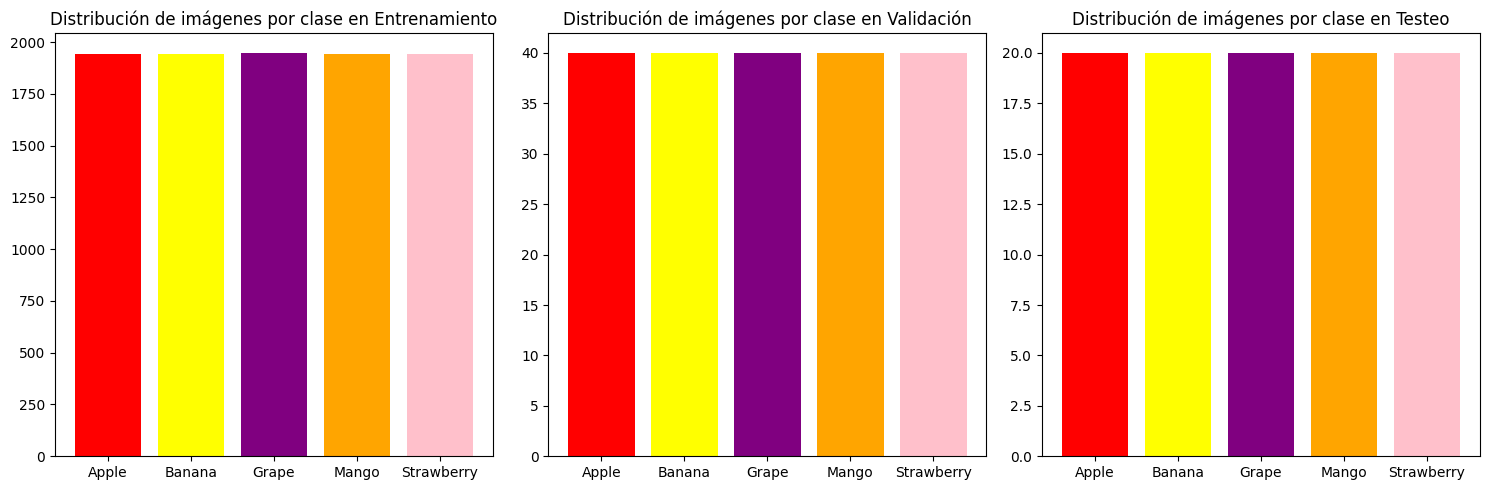

In [ ]:
# Colores para las barras del gr√°fico
color = ['red', 'yellow', 'purple', 'orange', 'pink']

# Crea la figura y ejes de los graficos
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Recorre el diccionario que contiene las rutas de los datasets y los ejes de los gr√°ficos
for (dataset_name, dataset_path), ax in zip(dataset_paths.items(), axes):
    # Distribuci√≥n de im√°genes por clase
    conteos = [len(os.listdir(os.path.join(dataset_path, clase))) for clase in clases]

    # Ajusta las caracter√≠sticas del eje correspondiente
    ax.bar(x=clases, height=conteos, color=color)
    ax.set_xticks(ticks=clases)
    ax.set_title(f'Distribuci√≥n de im√°genes por clase en {dataset_name}')

# Evita la superposici√≥n de los gr√°ficos
plt.tight_layout()
# Muestra los gr√°ficos
plt.show()

Se aprecian buenas distribuciones de datos en los 3 datasets principales. Si existiese una mala distribuci√≥n habr√≠a que aplicar t√©cnicas de balanceo de clases como **Oversampling** o **SMOTE**, entre otras.

### Visualizaci√≥n de Muestras Aleatorias
Para conocer visualmente el dataset y posibles problemas:
- Im√°genes corruptas
- Variaciones en el tama√±o, perpectiva, iluminaci√≥n...
- Ruido o im√°genes mal etiquetadas

Visualizamos muestras aleatorias del dataset de entrenamiento.

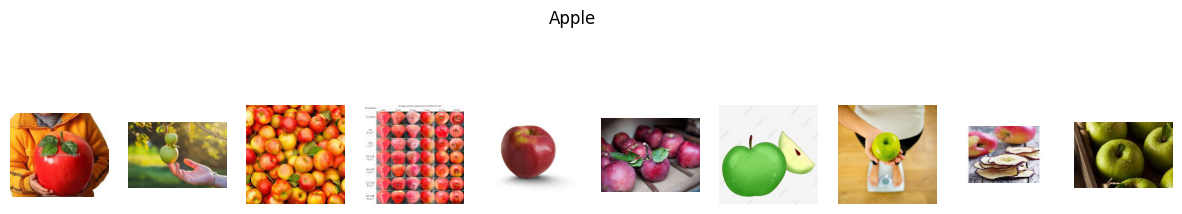

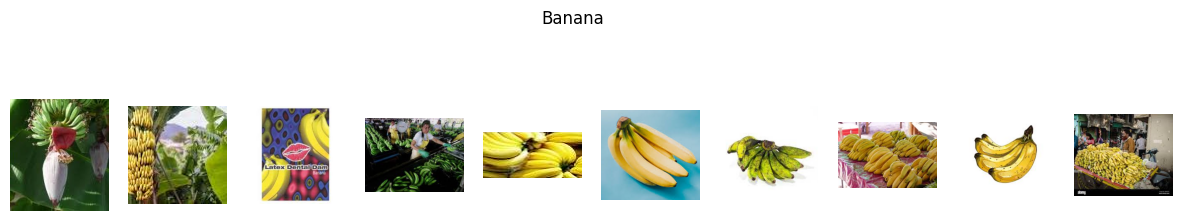

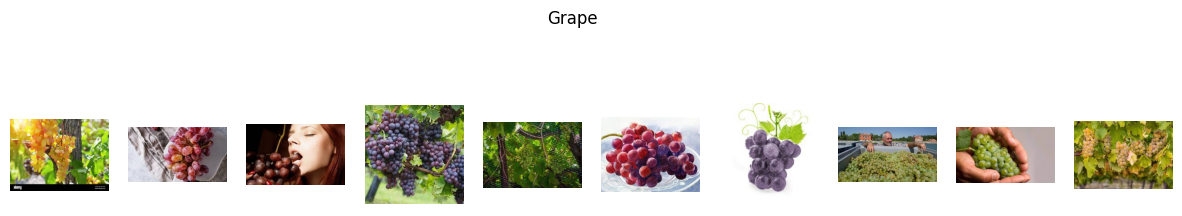

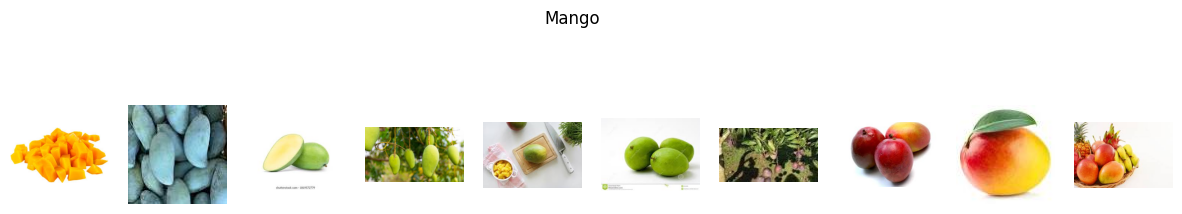

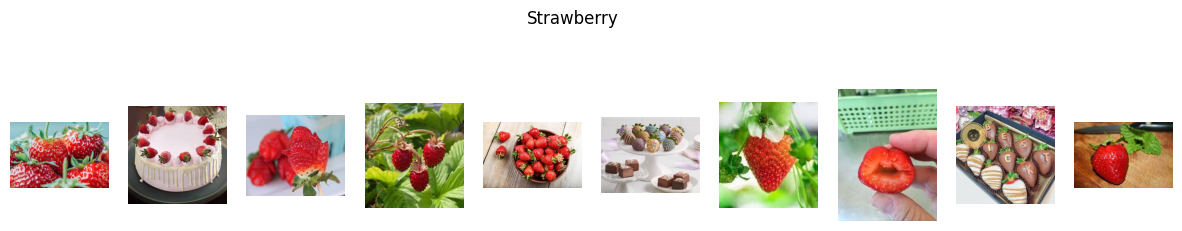

In [ ]:
# Itera sobre las clases encontradas y muestra 10 muestras aleatorias de cada una
for clase in clases:
    # Define la ruta a la clase dentro del dataset
    ruta_clase = os.path.join(dataset_paths['Entrenamiento'], clase)
    # Extrae una muestra aleatoria de 10 im√°genes 
    muestra = random.sample(os.listdir(ruta_clase), 10)
    # Crea la figura y ejes de los gr√°ficos
    fig, axes = plt.subplots(1, 10, figsize=(15,3))
    # T√≠tulo superior del gr√°fico
    fig.suptitle(clase)
    # Recorre las im√°genes de la muestra extra√≠da y las asigna a su eje correspondiente
    for i, img_nombre in enumerate(muestra):
        # Abre la imagen 
        img = Image.open(os.path.join(ruta_clase, img_nombre))
        # Muestra la imagen
        axes[i].imshow(img)
        # Quita los ejes
        axes[i].axis('off')
    # Muestra el gr√°fico
    plt.show()

Se aprecia que la variedad de im√°genes es bastente amplia, la misma clase contiene im√°genes con diferentes perspectivas, entornos, iliminaci√≥n, contexto, color... <br>
Esto nos da una idea sobre el modelo a utilizar, va a tener que ser un modelo muy complejo a nivel de estructura de capas debido a la complejidad de los patrones a detectar.

### An√°lisis de Dimensiones y Formato de las Im√°genes
Para saber si todas tienen el mismo tama√±o o hay que redimensionarlas. (Realizado sobre el dataset **Entrenamiento**)

In [186]:
# Objeto para contar el n√∫mero de repeticiones de un valor
from collections import Counter

# Lista para guardar las dimensiones de las im√°genes
dimensiones = []
# Itera sobre las clases encontradas y extrae sus dimensiones
for clase in clases:
    # Define la ruta a la clase dentro del dataset
    ruta_clase = os.path.join(dataset_paths['Entrenamiento'], clase)
    # Extrae las dimensiones de las im√°genes
    for img_nombre in os.listdir(ruta_clase):
        # Abre la imagen
        img = Image.open(os.path.join(ruta_clase, img_nombre))
        # A√±ade la dimensi√≥n de la imagen a la lista de dimensiones
        dimensiones.append(img.size)

# Crea un objeto Counter a partir de la lista de dimensiones
conteo_dim = Counter(dimensiones)
# Crea un dataframe a partir del objeto que contiene el conteo de dimensiones
df_dimensiones = pd.DataFrame(conteo_dim.items(), columns=['Dimensiones','Cantidad'])
# Muestra el dataframe ordenado por cantidad
df_dimensiones.sort_values(by='Cantidad', ascending=False)


Dimensiones  Cantidad
5     (275, 183)      1503
1     (225, 225)      1317
12    (100, 100)       616
7     (259, 194)       563
57    (183, 275)       454
...          ...       ...
543   (121, 182)         1
549    (82, 144)         1
550   (290, 124)         1
552     (81, 98)         1
1200  (183, 188)         1

[1201 rows x 2 columns]

Se aprecia que no hay una escala predeterminada para las im√°genes, los tama√±os mas frecuentes en el dataset son:
- 275x183 px: 1503 im√°genes encontradas.
- 225x225 px: 1317 im√°genes encontradas.
- 100x100 px: 616 im√°genes encontradas. 

Se aplicar√° un preprocesamiento a las mismas antes de proceder con el entrenamiento de la red.

### Estad√≠sticas de Color
Para comprobar si las im√°genes son en RGB, escala de grises... (Realizado sobre el dataset **Entrenamiento**)

In [ ]:
# Lista para guardar los formatos de las im√°genes
formatos = []
# Itera sobre las clases encontradas y extrae sus formatos
for clase in clases:
    # Define la ruta a la clase dentro del dataset
    ruta_clase = os.path.join(dataset_paths['Entrenamiento'], clase)
    # Extrae los formatos
    for img_nombre in os.listdir(ruta_clase):
        # Abre la imagen
        img = Image.open(os.path.join(ruta_clase, img_nombre))
        # A√±ade el formato de la imagen a la lista de formatos
        formatos.append(img.mode)

# Crea un objeto Counter a partir de la lista de formatos
conteo_for = Counter(formatos)
# Crea un dataframe a partir del objeto que contiene el conteo de dimensiones
df_formatos = pd.DataFrame(conteo_for.items(), columns=['Formato','Cantidad'])
# Muestra el dataframe ordenado por cantidad
df_formatos.sort_values(by='Cantidad', ascending=False)

Formato  Cantidad
0     RGB      9685
1       P        21
2    RGBA         1

Los formatos encontrados son los siguientes:
- RGB (3x8-bit pixels, a color).
- P (8-bit pixels, mapeado a otro modo mediante una paleta de color).
- RGBA (4x8-bit pixels, a color con un filtro de transparencia).

Se aplicara un preprocesamiento a las im√°genes para tener todas en el mismo formato. <br>
El formato a aplicar ser√° RGB, ya que el color es una caracter√≠stica fundamental en la clasificaci√≥n de frutas.

### Verificar im√°genes corruptas
En datasets muy grandes, es com√∫n encontrar im√°genes corruptas. Existen diferentes tipos de corrupci√≥n que pueden afectar a una imagen:
|       üìÇ Tipo de corrupci√≥n       | üìå Descripci√≥n                                                                                                   |
| :-------------------------------: | :--------------------------------------------------------------------------------------------------------------- |
|       **Archivo incompleto**      | El archivo se descarg√≥ parcialmente o se trunc√≥, y no contiene todos los datos necesarios para ser decodificado. |
| **Formato inv√°lido o incorrecto** | El archivo tiene una extensi√≥n `.jpg` pero en realidad no es un JPEG v√°lido (o es otro formato renombrado).      |
|     **Datos mal codificados**     | El contenido binario no sigue las especificaciones del formato de imagen.                                        |
|    **Metadatos inconsistentes**   | Informaci√≥n en el header de la imagen (dimensiones, canales, profundidad) no concuerda con los datos reales.     |
|        **Imagen ilegible**        | Librer√≠as como PIL, OpenCV, o matplotlib lanzan errores al intentar abrirla.                                     |
|   **Im√°genes vac√≠as (0 bytes)**   | Archivos sin contenido.                                                                                          |


In [189]:
# Lista para guardar las rutas de las im√°genes corruptas
errores = []

# Itera sobre las clases encontradas y detecta las imagenes corruptas
for clase in clases:
    # Define la ruta a la clase dentro del dataset
    ruta_clase = os.path.join(dataset_paths['Entrenamiento'], clase)
    # Extrae las rutas de las imagenes corruptas
    for img_nombre in os.listdir(ruta_clase):
        # Intenta abrir la imagen
        try:
            img = Image.open(os.path.join(ruta_clase, img_nombre))
            img.verify()  # Verifica sin cargar la imagen completa en memoria
        # En caso de error, se guarda la ruta de la imagen
        except:
            errores.append(os.path.join(clase, img_nombre))

# Muestra el numero de imagenes corruptas
print(f"Im√°genes corruptas encontradas: {len(errores)}")
print(errores)


Im√°genes corruptas encontradas: 0
[]


Se aprecia que el dataset **NO** contiene im√°genes corruptas. En el caso de que las hubiese habr√≠a que eliminarlas, ya que estas afectar√≠an al modelo.

### Conclusiones del EDA:
En funci√≥n del EDA realizado podemos sacar las siguientes conclusiones sobre nuestro conjunto de datos:
- Distribuci√≥n de Clases:
    - Todos los datasets dentro del dataset principal cuentan con una buena distribuci√≥n de clases.
    - No es necesario aplicar ning√∫n m√©todo de balanceo de clases.
    - El n√∫mero de im√°genes por dataset son: 
        - Entrenamiento: 9707 im√°genes.
        - Validaci√≥n: 200 im√°genes.
        - Testeo: 100 im√°genes.
- Visualizaci√≥n de muestras aleatorias:
    - La variedad de factores a tener en cuenta para la clasificaci√≥n es demasiado grande (perspectivas, entornos, iliminaci√≥n, contexto, color...).
    - Para obtener una buena clasificaci√≥n se deber√° utilizar un modelo con una estructura de capas compleja.
- An√°lisis de Dimensiones y Formato de las Im√°genes:
    - Las im√°genes no cuentan con un tama√±o predeterminado.
    - Se aplicar√° un preprocesamiento previo al entreno del modelo para definir un tama√±o general.
- Estad√≠sticas de Color:
    - Una gran parte de las im√°genes estan en formato RGB (A color), aunque una peque√±a parte se encuentra en un formato diferente.
    - Se aplicar√° un preprocesamiento previo al entreno del modelo para definir un formato general.
- Verificar im√°genes corruptas:
    - NO se han encontrado im√°genes corruptas.

## Carga, preprocesamiento y divisi√≥n de datos
En este apartado se realiza la carga, preprocesamiento y divisi√≥n de datos, todo en uno. <br> 
Esto es gracias a una funci√≥n de tensorflow denominada ``image_dataset_from_directory``, la cu√°l nos permite crear almacenes de im√°genes y establecer un flujo de datos entre el propio almac√©n y el modelo a entrenar. <br>
Crearemos tres almacenes de im√°genes diferentes:
- Una para entrenar el modelo.
- Otro para validar el modelo.
- Un √∫ltimo para testear el modelo ya entrenado.

Todos ellos contar√°n con el mismo proprocesamiento y divisi√≥n de datos. <br>
El tama√±o elegido para las im√°genes es de 224x224x3 px, esto es debido a que las redes convolucionales preentrenadas a utilizar fueron entranadas con estos tama√±os.

In [ ]:
# Librerias para trabajar con datasets
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Variables de preprocesamiento
img_size = (224, 224)
img_mode = 'rgb'
# Variables de divisi√≥n de datos
batch_size = 32

# Creaci√≥n de los almacenes de datos que contienen las im√°genes
# Dataset de entrenamiento
print(15 * '-' + "DATASET ENTRENAMIENTO" + 15 * '-')
train_ds = image_dataset_from_directory(
    directory="Fruits Classification/train", # Directorio con las im√°genes de entrenamiento
    labels='inferred', # Indica que las etiquetas de las clases se obtienen de las subcarpetas en el dataset
    label_mode='categorical', # Indica que las etiquetas se encodean como un vector categ√≥rico (Multiclase)
    color_mode = img_mode, # Preprocesa las im√°genes y las pasa a formato RGB
    image_size=img_size, # Preprocesa las im√°genes para que tengan un tama√±o de 224x224 px
    validation_split=0.2, # Fracciona los datos para crear un conjunto de validaci√≥n
    subset='training', # Indica que el dataset se usar√° para entrenamiento
    batch_size = batch_size, # Indica el tama√±o de los lotes en los que actualizar los pesos
    seed=42 # Asegura la aleatoridad de los datos para reproducibilidad
)

# Dataset de validaci√≥n
print(15 * '-' + "DATASET VALIDACI√ìN" + 15 * '-')
val_ds = image_dataset_from_directory(
    directory="Fruits Classification/train", 
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='validation',
    color_mode = img_mode,
    image_size=img_size,
    batch_size = batch_size,
    seed=42
)

# Dataset de testeo
print(15 * '-' + "DATASET TEST" + 15 * '-')
test_ds = image_dataset_from_directory(
    directory="Fruits Classification/test",
    labels='inferred',
    label_mode='categorical',
    color_mode = img_mode,
    image_size=img_size,
    batch_size = batch_size,
    seed=42
)

# Define el algoritmo de optimizaci√≥n AUTOTUNE, esto optimiza el flujo de datos entre los datasets y el model.
# M√°s informaci√≥n sobre AUTOTUNE: https://www.tensorflow.org/guide/data_performance?hl=es-419
AUTOTUNE = tf.data.AUTOTUNE
# Aplica el algoritmo a los almacenes de im√°genes definidos
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

---------------DATASET ENTRENAMIENTO---------------
Found 9707 files belonging to 5 classes.
Using 7766 files for training.
---------------DATASET VALIDACI√ìN---------------
Found 9707 files belonging to 5 classes.
Using 1941 files for validation.
---------------DATASET TEST---------------
Found 100 files belonging to 5 classes.


## Entrenamiento de modelos
Como ya se ha comentado previamente, las im√°genes para la clasificaci√≥n requieren de una estructura de capas compleja debido a la gran variedad de factores presentes en las mismas. <br>
Se van a realizar varios entrenamientos con diversos modelos:
- Una red sencilla con estructura VGG-like.
- Redes preentrenadas enfocadas al clasificamiento de im√°genes:
    - Resnet50
    - MobileNetV2
    - EfficientNetB0

En estas √∫ltimas, como se tratan de redes ya entrenadas, realizaremos una t√©cnica denominada como ``fine-tuning``. <br>
Esta consiste en cambiar los par√°metros de un modelo previamente entrenado para responder a una tarea o un conjunto de datos espec√≠fico. <br>
Finalmente se proceder√° a una comparaci√≥n en las m√©tricas de evaluaci√≥n de los modelos para decidir cual es la mejor.

### Importaci√≥n de librer√≠as necesarias para el entrenamiento de los modelos

In [3]:
# Librerias para trabajar con redes neuronales
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from time import time

### Modelo VGG-Like
| üìå Modelo          | üìñ Descripci√≥n| üìà Pros | ‚ö†Ô∏è Contras|
| :----------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------- | :--------------------------------------- |
| **VGG-Like**       | Arquitectura cl√°sica basada en pilas secuenciales de bloques `Conv -> ReLU -> MaxPool`, con capas totalmente conectadas al final. Inspirada en **VGG16/VGG19**.| Simple de implementar y entender.                        | Pesado en par√°metros y memoria.          |

#### Carga y creaci√≥n del modelo

In [ ]:
# Creaci√≥n de un modelo VGG-Like
model = Sequential([
    # Extracci√≥n de caracter√≠sticas
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(),

    # Aplanamiento de caracter√≠sticas
    Flatten(),
    # Procesamiento de caracter√≠sticas
    Dense(512, activation='relu'),
    # Salida softmax de 5 clases
    Dense(5, activation='softmax')
])

#### Compilaci√≥n y entrenamiento del modelo

In [5]:
# Compilar y entrenar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Establece un EarlyStoping para prevenir el sobreajuste y detener el entrenamiento en las √©pocas adecuadas
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

inicio = time() # Inicio de entrenamiento
# Entrenamiento
history = model.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=64, validation_split=0.1, verbose=2, callbacks=[early_stop])
final = time() # Final de entrenamiento

# Mostrar duraci√≥n de entrenamiento
print(f"Duraci√≥n del entrenamiento: {final - inicio:.2f} s")

Epoch 1/50
243/243 - 70s - loss: 76.6187 - accuracy: 0.2087 - val_loss: 1.6104 - val_accuracy: 0.2500 - 70s/epoch - 286ms/step
Epoch 2/50
243/243 - 53s - loss: 1.6016 - accuracy: 0.2147 - val_loss: 1.6406 - val_accuracy: 0.2000 - 53s/epoch - 216ms/step
Epoch 3/50
243/243 - 52s - loss: 1.5887 - accuracy: 0.2283 - val_loss: 1.6589 - val_accuracy: 0.2000 - 52s/epoch - 213ms/step
Epoch 4/50
243/243 - 52s - loss: 1.5889 - accuracy: 0.2430 - val_loss: 1.6482 - val_accuracy: 0.2250 - 52s/epoch - 213ms/step
Epoch 5/50
243/243 - 52s - loss: 1.5369 - accuracy: 0.2662 - val_loss: 2.3125 - val_accuracy: 0.2250 - 52s/epoch - 213ms/step
Epoch 6/50
243/243 - 52s - loss: 1.4680 - accuracy: 0.3155 - val_loss: 2.0670 - val_accuracy: 0.2000 - 52s/epoch - 214ms/step
Duraci√≥n del entrenamiento: 329.57 s


#### M√©tricas de evaluaci√≥n

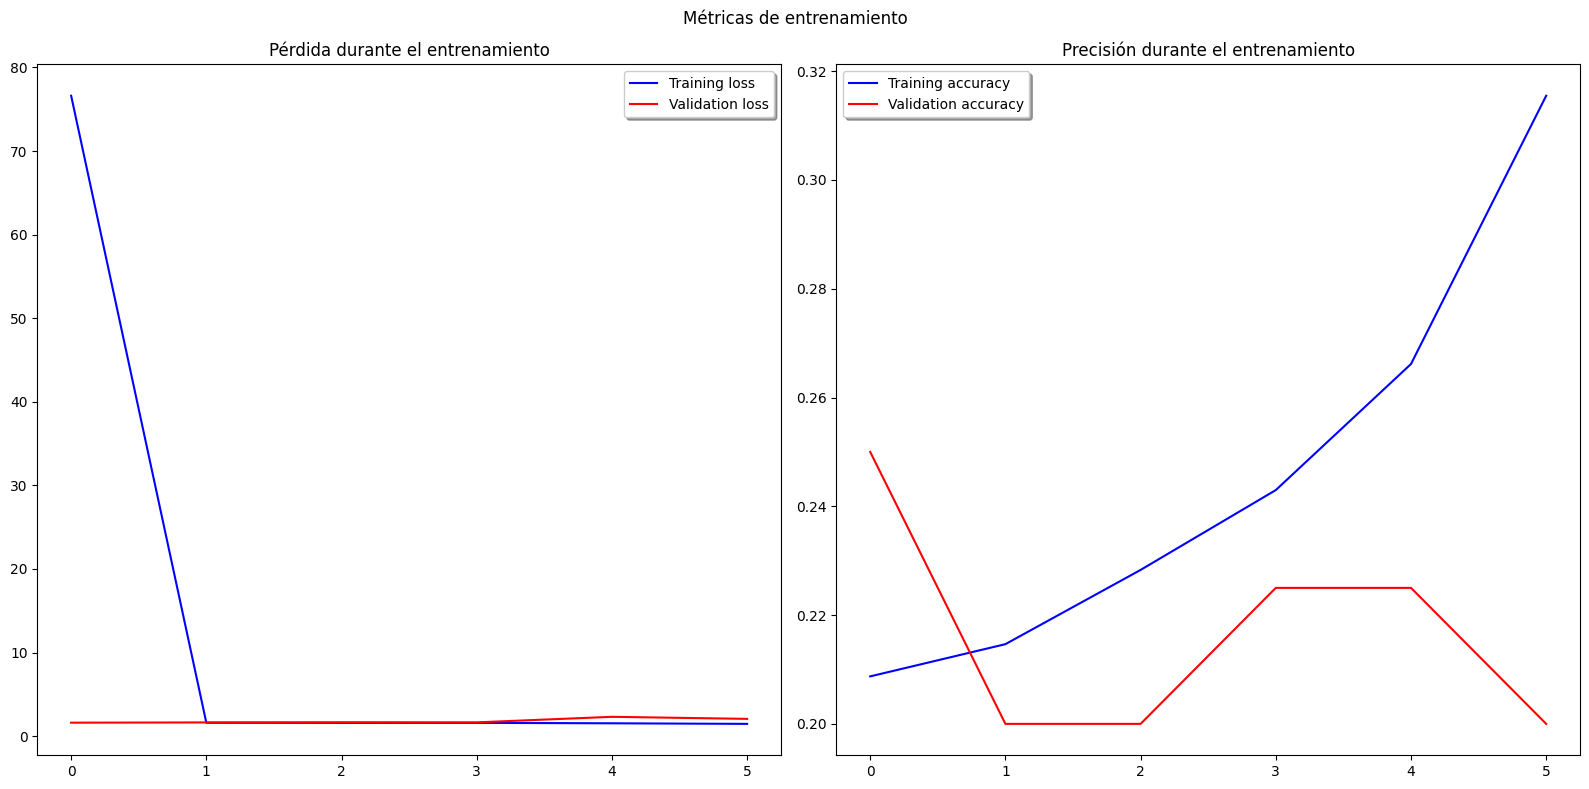

Test Accuracy: 21.00%
Test Loss: 1.6042
Mejor Validation Loss: 1.6104
1/1 [==============================] - 0s 58ms/step


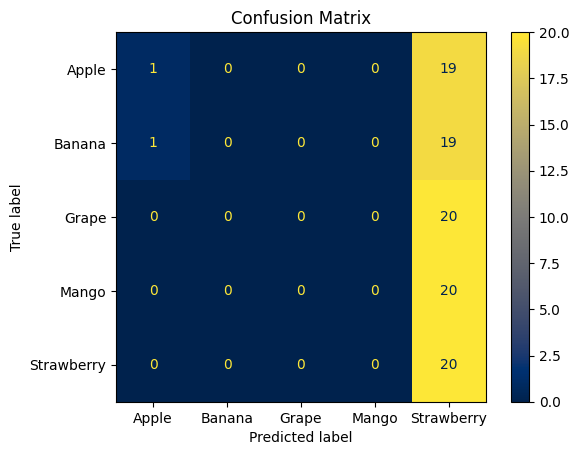

              precision    recall  f1-score   support

       Apple       0.50      0.05      0.09        20
      Banana       0.00      0.00      0.00        20
       Grape       0.00      0.00      0.00        20
       Mango       0.00      0.00      0.00        20
  Strawberry       0.20      1.00      0.34        20

    accuracy                           0.21       100
   macro avg       0.14      0.21      0.09       100
weighted avg       0.14      0.21      0.09       100



c:\USERS\SFESP\ONEDRIVE\ESCRITORIO\PROGRAMACI√ìN\PROGRAMACI√ìN MODELOS DE IA\PROYECTO FINAL\.VENV_GPU\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\USERS\SFESP\ONEDRIVE\ESCRITORIO\PROGRAMACI√ìN\PROGRAMACI√ìN MODELOS DE IA\PROYECTO FINAL\.VENV_GPU\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\USERS\SFESP\ONEDRIVE\ESCRITORIO\PROGRAMACI√ìN\PROGRAMACI√ìN MODELOS DE IA\PROYECTO FINAL\.VENV_GPU\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is 

In [6]:
# === Gr√°ficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# P√©rdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('P√©rdida durante el entrenamiento')

# Precisi√≥n
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisi√≥n durante el entrenamiento')

# Mostrar gr√°ficos
plt.suptitle("M√©tricas de entrenamiento")
plt.tight_layout()
plt.show()

# Obtener la precisi√≥n y p√©rdida del conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Obtener la p√©rdida mas baja en la validaci√≥n
val_loss = min(history.history['val_loss'])
print(f"Mejor Validation Loss: {val_loss:.4f}")


# Listas donde almacenar las predicciones del modelo
# Valores reales
y_true = []
# Valores predichos
y_pred = []

# Realiza las predicciones con el conjunto de validaci√≥n y almacena sus resultados
for image, labels in test_ds:
    # Realiza la predicci√≥n
    preds = model.predict(image)
    # A√±ade la etiqueta real de la imagen actual
    y_true.extend(labels.numpy())
    # A√±ade la etiqueta predicha por el modelo
    y_pred.extend(preds)

# Guardamos el indice con el mayor valor de cada array
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Apple","Banana","Grape","Mango","Strawberry"])
disp.plot(cmap=plt.cm.cividis)
plt.title("Confusion Matrix")
plt.show()

# Reporte de clasificaci√≥n para analizar m√©tricas por cada clase por separado
print(classification_report(y_true, y_pred, target_names=["Apple","Banana","Grape","Mango","Strawberry"]))


### Interpretaci√≥n de resultados
Como era de esperar el modelo tiene un rendimiento nefasto, una estructura de capas tan simple no es capaz de conseguir adaptarse a unas im√°genes con tantos patrones.
- Se obtiene una precisi√≥n y p√©rdida mediocres en el entrenamiento pero cae en picado en la validaci√≥n.
- La red es totalmente incapaz de diferenciar datos nuevos de entrada, como se muestra en la matriz de confusi√≥n.

### Modelo ResNet50
| üìå Modelo          | üìñ Descripci√≥n                                                                                                                                                              | üìà Pros                                                  | ‚ö†Ô∏è Contras                               |
| :----------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------- | :--------------------------------------- |
| **ResNet50**       | CNN profunda de **50 capas** con **bloques residuales (skip connections)** que evitan el problema de desvanecimiento del gradiente y permiten entrenar redes muy profundas. | Muy buena precisi√≥n y estabilidad en redes profundas.    | M√°s pesada que MobileNet o EfficientNet. |

#### Carga y creaci√≥n del modelo

In [19]:
from tensorflow.keras.applications import ResNet50

# Cargar ResNet50 sin top
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False # Evita que se modifiquen los pesos del modelo preentrenado durante el entrenamiento

# Agregar cabeza personalizada
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)
model_resnet = Model(inputs, outputs)

#### Compilaci√≥n y entrenamiento del modelo

In [20]:
# Compilar y entrenar
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Establece un EarlyStoping para prevenir el sobreajuste y detener el entrenamiento en las √©pocas adecuadas
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

inicio = time() # Inicio de entrenamiento
# Entrenamiento
history = model_resnet.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stop])
final = time() # Final de entrenamiento

# Mostrar duraci√≥n de entrenamiento
print(f"Duraci√≥n del entrenamiento: {final - inicio:.2f} s")

Epoch 1/50
243/243 [==============================] - 23s 89ms/step - loss: 0.6067 - accuracy: 0.7810 - val_loss: 0.4386 - val_accuracy: 0.8475
Epoch 2/50
243/243 [==============================] - 21s 85ms/step - loss: 0.3485 - accuracy: 0.8781 - val_loss: 0.4250 - val_accuracy: 0.8496
Epoch 3/50
243/243 [==============================] - 21s 85ms/step - loss: 0.2488 - accuracy: 0.9164 - val_loss: 0.3921 - val_accuracy: 0.8624
Epoch 4/50
243/243 [==============================] - 21s 85ms/step - loss: 0.1830 - accuracy: 0.9375 - val_loss: 0.3951 - val_accuracy: 0.8686
Epoch 5/50
243/243 [==============================] - 21s 86ms/step - loss: 0.1191 - accuracy: 0.9643 - val_loss: 0.4067 - val_accuracy: 0.8645
Epoch 6/50
243/243 [==============================] - 21s 86ms/step - loss: 0.0876 - accuracy: 0.9741 - val_loss: 0.4356 - val_accuracy: 0.8691
Epoch 7/50
243/243 [==============================] - 21s 86ms/step - loss: 0.0583 - accuracy: 0.9849 - val_loss: 0.4617 - val_accuracy:

#### M√©tricas de evaluaci√≥n

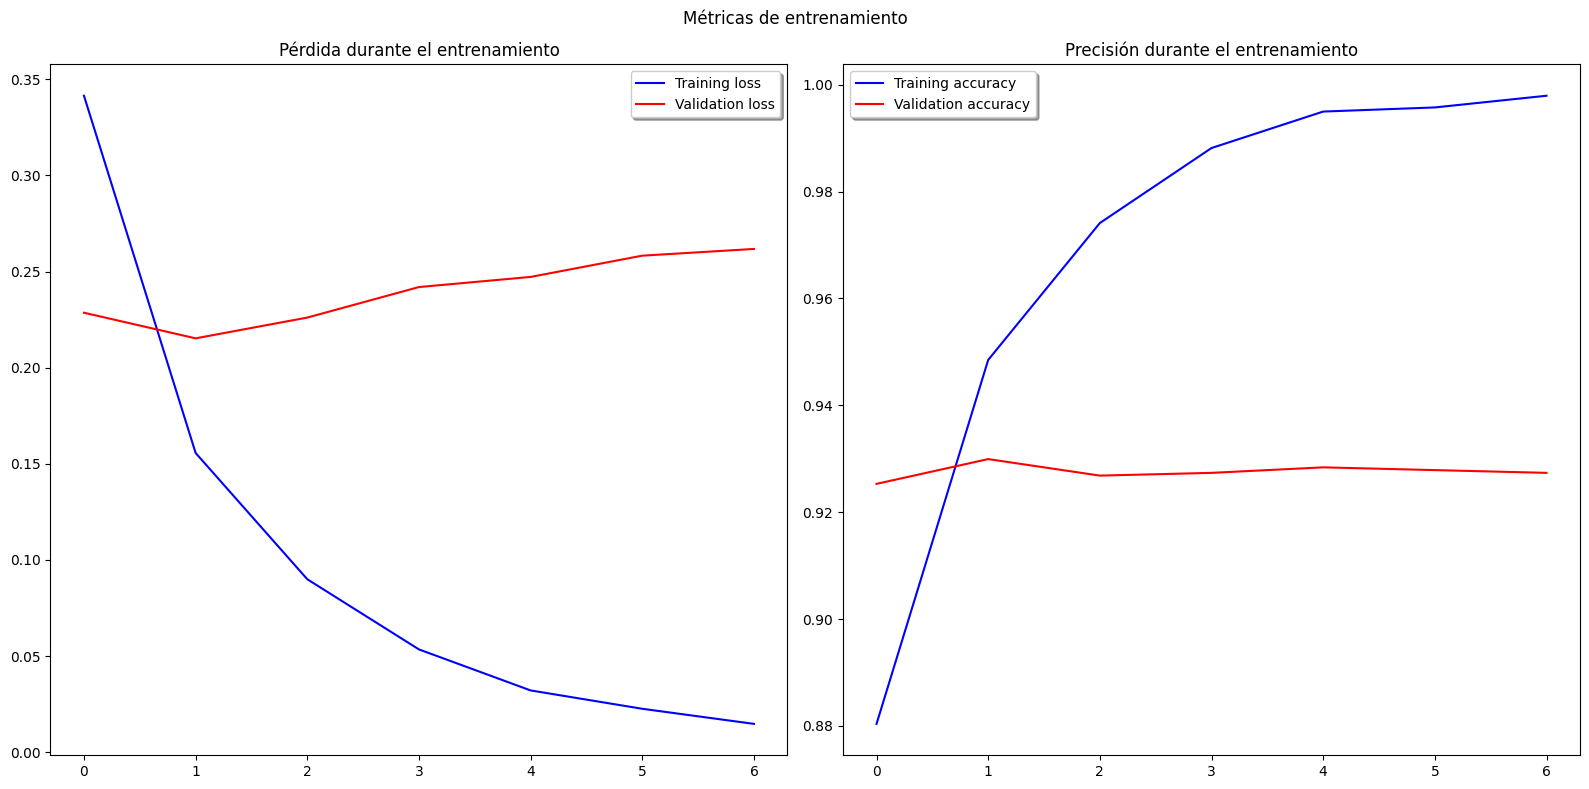

Test Accuracy: 89.00%
Test Loss: 0.3510
Mejor Validation Loss: 0.2153
1/1 [==============================] - 0s 26ms/step


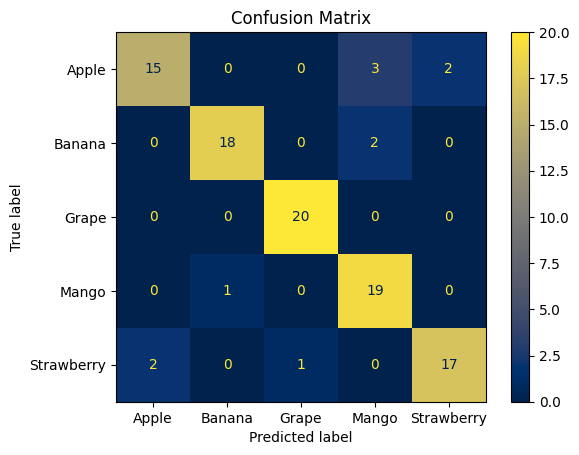

              precision    recall  f1-score   support

       Apple       0.88      0.75      0.81        20
      Banana       0.95      0.90      0.92        20
       Grape       0.95      1.00      0.98        20
       Mango       0.79      0.95      0.86        20
  Strawberry       0.89      0.85      0.87        20

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



In [35]:
# === Gr√°ficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# P√©rdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('P√©rdida durante el entrenamiento')

# Precisi√≥n
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisi√≥n durante el entrenamiento')

# Mostrar gr√°ficos
plt.suptitle("M√©tricas de entrenamiento")
plt.tight_layout()
plt.show()

# Obtener la precisi√≥n y p√©rdida del conjunto de prueba
test_loss, test_accuracy = model_resnet.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Obtener la p√©rdida mas baja en la validaci√≥n
val_loss = min(history.history['val_loss'])
print(f"Mejor Validation Loss: {val_loss:.4f}")

# Listas donde almacenar las predicciones del modelo
# Valores reales
y_true = []
# Valores predichos
y_pred = []

# Realiza las predicciones con el conjunto de validaci√≥n y almacena sus resultados
for image, labels in test_ds:
    # Realiza la predicci√≥n
    preds = model_resnet.predict(image)
    # A√±ade la etiqueta real de la imagen actual
    y_true.extend(labels.numpy())
    # A√±ade la etiqueta predicha por el modelo
    y_pred.extend(preds)

# Guardamos el indice con el mayor valor de cada array
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Apple","Banana","Grape","Mango","Strawberry"])
disp.plot(cmap=plt.cm.cividis)
plt.title("Confusion Matrix")
plt.show()

# Reporte de clasificaci√≥n para analizar m√©tricas por cada clase por separado
print(classification_report(y_true, y_pred, target_names=["Apple","Banana","Grape","Mango","Strawberry"]))


### Interpretaci√≥n de m√©tricas
Este modelo ya es otra cosa comparado con el anterior:
- Aunque se puede apreciar en las gr√°ficas de p√©rdida y precisi√≥n que la validaci√≥n y entrenamiento distan un poco entre s√≠, lo cual ser√≠a un signo claro de sobreajuste, es normal ya que estamos empleando un datastet muy peque√±o para realizar fine tunning sobre una red la cual ha sido entrenada con millones de im√°genes.
- Seg√∫n la matriz de confusi√≥n, la red es capaz de clasificar con bastante precisi√≥n nuevos datos de entrada.

Por el momento la CNN con mejores resultados.


### Modelo MobileNetV2
| üìå Modelo          | üìñ Descripci√≥n                                                                                                                                                              | üìà Pros                                                  | ‚ö†Ô∏è Contras                               |
| :----------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------- | :--------------------------------------- |
| **MobileNetV2**    | Modelo optimizado para dispositivos m√≥viles y sistemas embebidos, usa **depthwise separable convolutions** y **inverted residuals** para reducir c√≥mputo y tama√±o.          | Ligero y r√°pido, buen rendimiento en entornos limitados. | Precisi√≥n menor a ResNet/EfficientNet.   |

#### Carga y creaci√≥n del modelo

In [37]:
from tensorflow.keras.applications import MobileNetV2

# Cargar MobileNetV2 sin top
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False # Detiene la base de la red para no entrenarla

# Agrega una nueva capa de entreda y salida que se ajuste a nuestro dataset
inputs = Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
# Salida softmax de 5 clases
outputs = Dense(5, activation='softmax')(x)

# Definici√≥n final del modelo
model_mobilenet = Model(inputs, outputs)

#### Compilaci√≥n y entrenamiento del modelo

In [40]:
# Compilar y entrenar
model_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Establece un EarlyStoping para prevenir el sobreajuste y detener el entrenamiento en las √©pocas adecuadas
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

inicio = time() # Inicio de entrenamiento
# Entrenamiento
history = model_mobilenet.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stop])
final = time() # Final de entrenamiento

# Mostrar duraci√≥n de entrenamiento
print(f"Duraci√≥n del entrenamiento: {final - inicio:.2f} s")

Epoch 1/50
243/243 [==============================] - 14s 51ms/step - loss: 0.9534 - accuracy: 0.6273 - val_loss: 1.0866 - val_accuracy: 0.5873
Epoch 2/50
243/243 [==============================] - 11s 47ms/step - loss: 0.9104 - accuracy: 0.6449 - val_loss: 1.1766 - val_accuracy: 0.5507
Epoch 3/50
243/243 [==============================] - 12s 49ms/step - loss: 0.8624 - accuracy: 0.6693 - val_loss: 1.1158 - val_accuracy: 0.5791
Epoch 4/50
243/243 [==============================] - 12s 48ms/step - loss: 0.8375 - accuracy: 0.6792 - val_loss: 1.1155 - val_accuracy: 0.5827
Epoch 5/50
243/243 [==============================] - 12s 49ms/step - loss: 0.7866 - accuracy: 0.7011 - val_loss: 1.1036 - val_accuracy: 0.5930
Epoch 6/50
243/243 [==============================] - 12s 48ms/step - loss: 0.7503 - accuracy: 0.7132 - val_loss: 1.1738 - val_accuracy: 0.5662
Duraci√≥n del entrenamiento: 73.05 s


#### M√©tricas de evaluaci√≥n

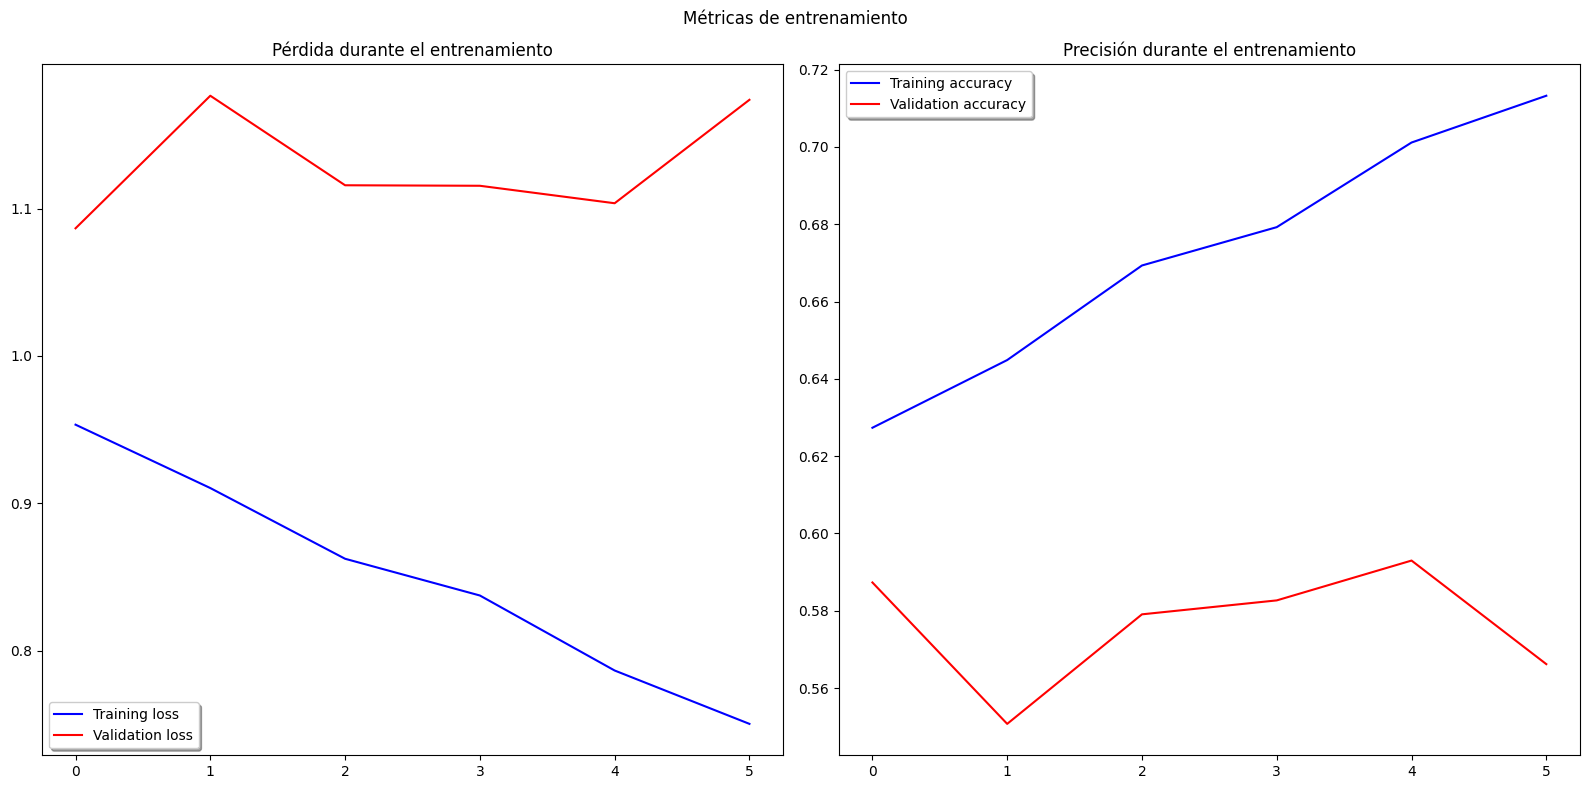

Test Accuracy: 61.00%
Test Loss: 1.0512
Mejor Validation Loss: 1.0866
1/1 [==============================] - 0s 481ms/step


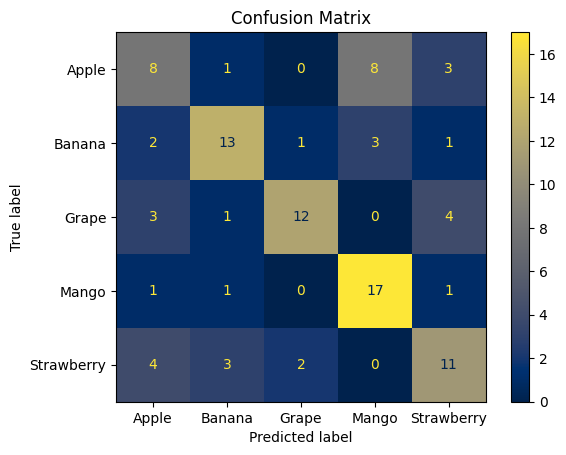

              precision    recall  f1-score   support

       Apple       0.44      0.40      0.42        20
      Banana       0.68      0.65      0.67        20
       Grape       0.80      0.60      0.69        20
       Mango       0.61      0.85      0.71        20
  Strawberry       0.55      0.55      0.55        20

    accuracy                           0.61       100
   macro avg       0.62      0.61      0.61       100
weighted avg       0.62      0.61      0.61       100



In [41]:
# === Gr√°ficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# P√©rdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('P√©rdida durante el entrenamiento')

# Precisi√≥n
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisi√≥n durante el entrenamiento')

# Mostrar gr√°ficos
plt.suptitle("M√©tricas de entrenamiento")
plt.tight_layout()
plt.show()

# Obtener la precisi√≥n y p√©rdida del conjunto de prueba
test_loss, test_accuracy = model_mobilenet.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Obtener la p√©rdida mas baja en la validaci√≥n
val_loss = min(history.history['val_loss'])
print(f"Mejor Validation Loss: {val_loss:.4f}")

# Listas donde almacenar las predicciones del modelo
# Valores reales
y_true = []
# Valores predichos
y_pred = []

# Realiza las predicciones con el conjunto de validaci√≥n y almacena sus resultados
for image, labels in test_ds:
    # Realiza la predicci√≥n
    preds = model_mobilenet.predict(image)
    # A√±ade la etiqueta real de la imagen actual
    y_true.extend(labels.numpy())
    # A√±ade la etiqueta predicha por el modelo
    y_pred.extend(preds)

# Guardamos el indice con el mayor valor de cada array
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Apple","Banana","Grape","Mango","Strawberry"])
disp.plot(cmap=plt.cm.cividis)
plt.title("Confusion Matrix")
plt.show()

# Reporte de clasificaci√≥n para analizar m√©tricas por cada clase por separado
print(classification_report(y_true, y_pred, target_names=["Apple","Banana","Grape","Mango","Strawberry"]))


### Interpretaci√≥n de m√©tricas
Obtenemos un rendimiento inferior a ResNet50:
- Las gr√°ficas de p√©rdida y precisi√≥n en entrenamiento y validaci√≥n est√°n demasiado dispersas entre si, posible sobreajuste.
- Seg√∫n la matriz de confusi√≥n, la red es capaz de clasificar con una precisi√≥n media los nuevos datos de entrada. Aunque con menos precisi√≥n que ResNet50.
- Convendr√≠a aplicar ``data augmentation`` para reducir el sobreajuste.
ResNet50 sigue manteniendo el primer puesto.

### Modelo EfficientNetB0
| üìå Modelo          | üìñ Descripci√≥n                                                                                                                                                              | üìà Pros                                                  | ‚ö†Ô∏è Contras                               |
| :----------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | :------------------------------------------------------- | :--------------------------------------- |
| **EfficientNetB0** | Modelo moderno que optimiza simult√°neamente **profundidad, ancho y resoluci√≥n** de la red mediante **compound scaling**. Gran relaci√≥n precisi√≥n/eficiencia.                | Alta precisi√≥n con menos par√°metros y FLOPs.             | Algo m√°s complejo de ajustar/customizar. |

#### Carga y creaci√≥n del modelo

In [42]:
from tensorflow.keras.applications import EfficientNetB0

# Cargar EfficientNetB0 sin la parte superior
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar la base para no entrenarla
base_model.trainable = False

# A√±adir capa de entrada y salida ajustada a nuestro dataset al modelo
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(5, activation='softmax')(x)

# Definici√≥n final del modelo
model_efficientNet = Model(inputs, outputs)

#### Compilaci√≥n y entrenamiento del modelo

In [43]:
# Compilar y entrenar
model_efficientNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Establece un EarlyStoping para prevenir el sobreajuste y detener el entrenamiento en las √©pocas adecuadas
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

inicio = time() # Inicio de entrenamiento
# Entrenamiento
history = model_efficientNet.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=64, validation_split=0.1, callbacks=[early_stop])
final = time() # Final de entrenamiento

# Mostrar duraci√≥n de entrenamiento
print(f"Duraci√≥n del entrenamiento: {final - inicio:.2f} s")

Epoch 1/50
243/243 [==============================] - 21s 72ms/step - loss: 0.3454 - accuracy: 0.8773 - val_loss: 0.2347 - val_accuracy: 0.9176
Epoch 2/50
243/243 [==============================] - 16s 67ms/step - loss: 0.1605 - accuracy: 0.9485 - val_loss: 0.2159 - val_accuracy: 0.9289
Epoch 3/50
243/243 [==============================] - 16s 66ms/step - loss: 0.0948 - accuracy: 0.9731 - val_loss: 0.2161 - val_accuracy: 0.9304
Epoch 4/50
243/243 [==============================] - 16s 67ms/step - loss: 0.0614 - accuracy: 0.9840 - val_loss: 0.2417 - val_accuracy: 0.9279
Epoch 5/50
243/243 [==============================] - 16s 66ms/step - loss: 0.0365 - accuracy: 0.9927 - val_loss: 0.2390 - val_accuracy: 0.9325
Epoch 6/50
243/243 [==============================] - 16s 65ms/step - loss: 0.0207 - accuracy: 0.9973 - val_loss: 0.2440 - val_accuracy: 0.9366
Epoch 7/50
243/243 [==============================] - 16s 67ms/step - loss: 0.0136 - accuracy: 0.9985 - val_loss: 0.2465 - val_accuracy:

#### M√©tricas de evaluaci√≥n

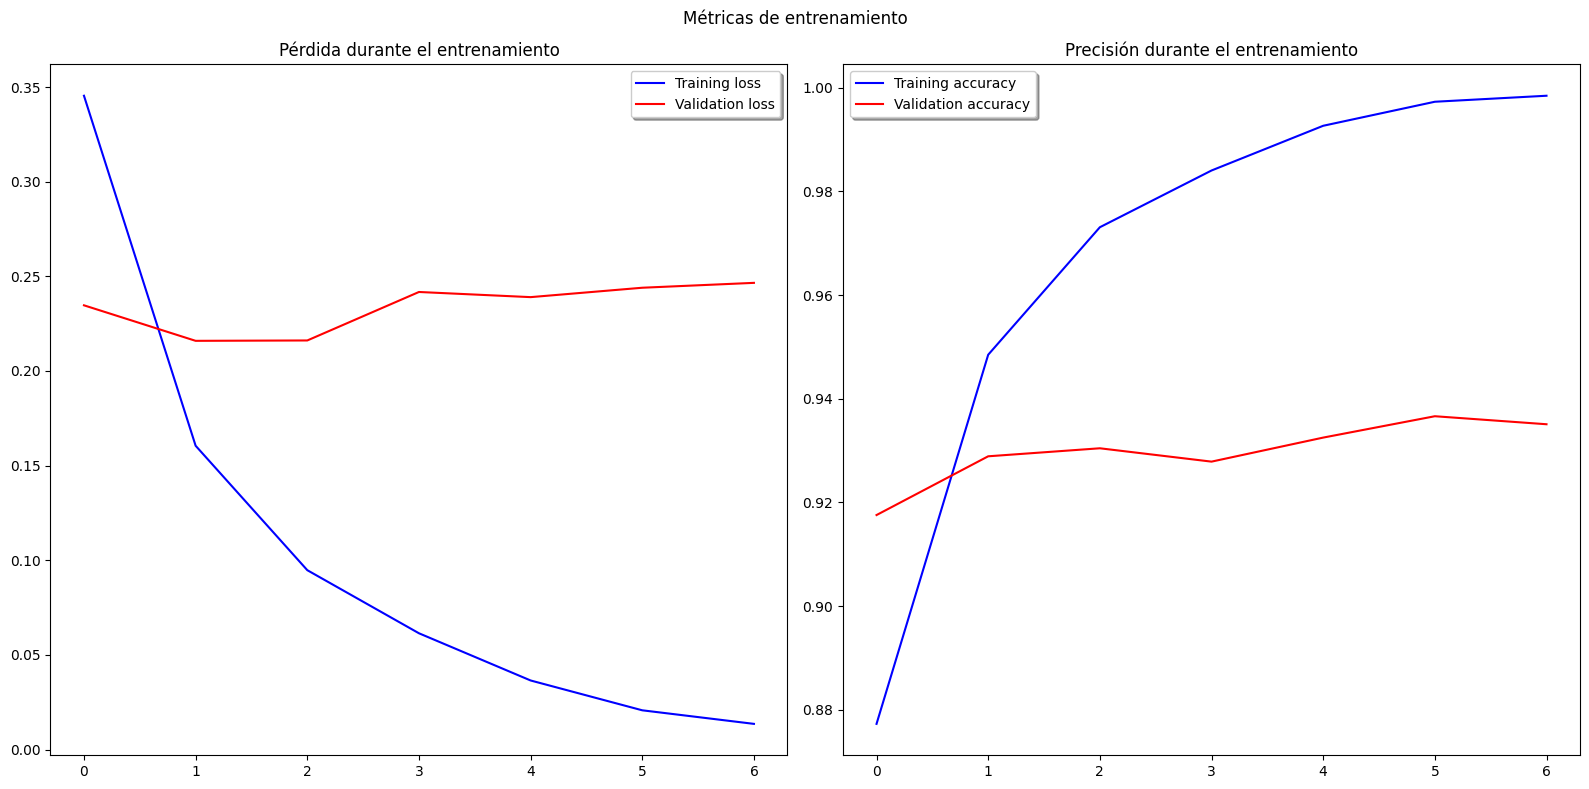

Test Accuracy: 93.00%
Test Loss: 0.2138
Mejor Validation Loss: 0.2159
1/1 [==============================] - 1s 942ms/step


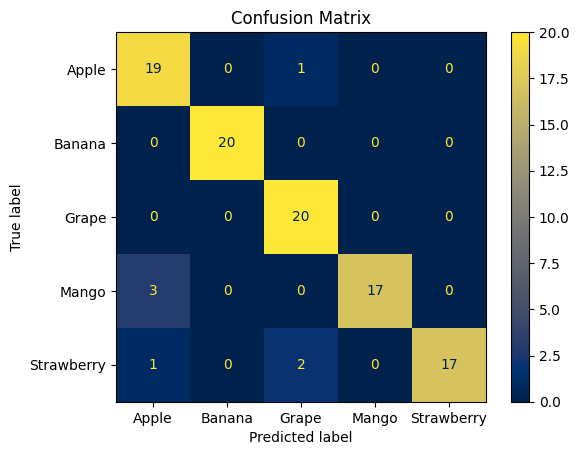

              precision    recall  f1-score   support

       Apple       0.83      0.95      0.88        20
      Banana       1.00      1.00      1.00        20
       Grape       0.87      1.00      0.93        20
       Mango       1.00      0.85      0.92        20
  Strawberry       1.00      0.85      0.92        20

    accuracy                           0.93       100
   macro avg       0.94      0.93      0.93       100
weighted avg       0.94      0.93      0.93       100



In [44]:
# === Gr√°ficos del entrenamiento ===
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# P√©rdida
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].legend(loc='best', shadow=True)
ax[0].set_title('P√©rdida durante el entrenamiento')

# Precisi√≥n
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].legend(loc='best', shadow=True)
ax[1].set_title('Precisi√≥n durante el entrenamiento')

# Mostrar gr√°ficos
plt.suptitle("M√©tricas de entrenamiento")
plt.tight_layout()
plt.show()

# Obtener la precisi√≥n y p√©rdida del conjunto de prueba
test_loss, test_accuracy = model_efficientNet.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Obtener la p√©rdida mas baja en la validaci√≥n
val_loss = min(history.history['val_loss'])
print(f"Mejor Validation Loss: {val_loss:.4f}")

# Listas donde almacenar las predicciones del modelo
# Valores reales
y_true = []
# Valores predichos
y_pred = []

# Realiza las predicciones con el conjunto de validaci√≥n y almacena sus resultados
for image, labels in test_ds:
    # Realiza la predicci√≥n
    preds = model_efficientNet.predict(image)
    # A√±ade la etiqueta real de la imagen actual
    y_true.extend(labels.numpy())
    # A√±ade la etiqueta predicha por el modelo
    y_pred.extend(preds)

# Guardamos el indice con el mayor valor de cada array
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)

# Matriz de confusi√≥n
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Apple","Banana","Grape","Mango","Strawberry"])
disp.plot(cmap=plt.cm.cividis)
plt.title("Confusion Matrix")
plt.show()

# Reporte de clasificaci√≥n para analizar m√©tricas por cada clase por separado
print(classification_report(y_true, y_pred, target_names=["Apple","Banana","Grape","Mango","Strawberry"]))


### Interpretaci√≥n de m√©tricas
Obtenemos un rendimiento superior a ResNet50:
- Aunque se puede apreciar en las gr√°ficas de p√©rdida y precisi√≥n que la validaci√≥n y entrenamiento distan un poco entre s√≠, lo cual ser√≠a un signo claro de sobreajuste, es normal ya que estamos empleando un datastet muy peque√±o para realizar fine tunning sobre una red la cual ha sido entrenada con millones de im√°genes.
- Seg√∫n la matriz de confusi√≥n, la red es capaz de clasificar con mucha precisi√≥n nuevos datos de entrada. Con una mayor precisi√≥n que ResNet50.

El modelo ganador ü•≥ü•≥ü•≥

## Tabla comparativa de modelos
| Modelo      | Test Accuracy (%) | Precision Macro (%) | Recall Macro (%) | F1-Score Macro (%) | Validation Loss | Test Loss | Tiempo de Entrenamiento (segundos) |
| :---------- | :---------------: | :------------------ | :--------------- | :----------------- | :-------------- | :-------- | :---------------------------- |
|    VGG-like |        21.0       | 14                | 21             | 9               | 1.6104            | 1.6042      | 329.57                            |
|    ResNet50 |        89       | 89                | 89             | 89               | 0.2153            | 0.3510      | 169.82                            |
| MobileNetV2 |         61         |62                   | 61                | 61                  | 1.0866               | 1.0512         | 73.05                             |
|EfficientNetB0|         93         | 94                   | 93                | 93                  | 0.2159              |0.2138        | 118.38                             |

## Conclusi√≥n final
Bas√°ndonos en la tabla comparativa de modelos podemos decir con seguridad que el mejor modelo para este problema de clasificaci√≥n es **EfficientNetB0**:
| Modelo             | Conclusi√≥n r√°pida                                                                                                                                                      |
| :----------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **EfficientNetB0** | üèÜ Mejor modelo global: m√°xima test accuracy (93%), muy buen balance de precision/recall/F1, y training time razonable.                                                |
| **ResNet50**       | Muy s√≥lido (89%), con m√©tricas homog√©neas, aunque algo m√°s pesado que MobileNetV2. Ideal si buscas robustez.                                                           |
| **MobileNetV2**    | Rendimiento intermedio (61%), pero excelente opci√≥n si buscas **modelo ligero y r√°pido** (73 s de entrenamiento). Probablemente mejorar√≠a mucho con data augmentation. |
| **VGG-like**       | Muy bajo rendimiento (21%), como es habitual en arquitecturas simples frente a redes modernas.                                    |
